# Lab 05: Exploratory Data Analysis (EDA) with Dimensionality Reduction
### Author: Nigel Nelson
## Introduction:
•	This labs acts as an exercise in using dimensionality reduction techniques in order to aid in the exploratory data analysis of a data set comprised of emails that are labeled as spam, or not spam. This data set contains 65,542 emails, all of which are stored as separate JSON files stored in a central directory. Each one of these email JSON files contains 5 features, the category describing if the email was spam or not, the email address of the recipient, the email address of the sender, the subject line of the email, and the body of the email. Students are tasked with converting this data to a Pandas DataFrame for easier manipulation. Next, this DataFrame is converted into a feature matrix in the form of a bag-of-words model of the underlying emails. Following this, a second feature matrix is created from the bag-of-words model using SVD to distill all of the information of the native emails into 10 columns/components. These components are then visualized using plotting libraries, and the relationships of the components are analyzed and interpreted to gain insight on whether the components found undying patterns in the emails that allows for differentiation between spam and non-spam emails. Finally, different storage methods for these feature matrixes are compared and contrasted by computing the storage requirements for each, and ultimately used to determine which storage method is best applied in this problem space.

### Imports:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
import glob
import os
import json
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

## Part I: Load the Data
### Loading in the Email Data Set:

In [2]:
email_dicts = []
json_dir_name = 'email_json/email_json'

json_pattern = os.path.join(json_dir_name, '*.json')
file_list = glob.glob(json_pattern)

for file in file_list:
    with open(file) as json_file:
        dict_data = json.load(json_file)
        email_dicts.append(dict_data)

### Creating an Emails DataFrame:

In [3]:
email_df = pd.DataFrame.from_dict(email_dicts)
email_df['category'] = email_df['category'].astype('category')
email_df.head()

,category,to_address,from_address,subject,body
0,spam,the00@speedy.uwaterloo.ca,"""Tomas Jacobs"" <RickyAmes@aol.com>","Generic Cialis, branded quality@",\n\n\n\n\n\n\nDo you feel the pressure to perf...
1,ham,debian-mirrors@lists.debian.org,Yan Morin <yan.morin@savoirfairelinux.com>,Typo in /debian/README,"Hi, i've just updated from the gulus and I che..."
2,spam,<the00@plg.uwaterloo.ca>,"""Sheila Crenshaw"" <7stocknews@tractionmarketin...",authentic viagra,authentic viagra\n\nMega authenticV I A G R A...
3,spam,opt4@speedy.uwaterloo.ca,"""Stormy Dempsey"" <vqucsmdfgvsg@ruraltek.com>",Nice talking with ya,"\nHey Billy, \n\nit was really fun going out t..."
4,spam,ktwarwic@speedy.uwaterloo.ca,"""Christi T. Jernigan"" <dcube@totalink.net>",or trembling; stomach cramps; trouble in sleep...,"\n\n\n\n\n\n\nsystem"" of the home. It will ha..."


In [4]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63542 entries, 0 to 63541
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   category      63542 non-null  category
 1   to_address    63141 non-null  object  
 2   from_address  63542 non-null  object  
 3   subject       63410 non-null  object  
 4   body          63542 non-null  object  
dtypes: category(1), object(4)
memory usage: 2.0+ MB


## Part II: Extract Features
### Using Scikit Learn's to Create Feature Matrix:

In [5]:
vectorizer = CountVectorizer(binary=True)
feat_matrix = vectorizer.fit_transform(email_df['body'])

In [6]:
print(f'Feature matrix # columns: {feat_matrix.shape[1]}')
print(f'Feature matrix # rows: {feat_matrix.shape[0]}')
print(f'Feature matrix # nonzero entries: {csr_matrix.count_nonzero(feat_matrix)}\n')
print(f'Number of unique words in the vocabulary dictionary: {len(vectorizer.vocabulary_)}')

work_idk = vectorizer.vocabulary_.get('work')
love_idk = vectorizer.vocabulary_.get('love')
diff_idk = vectorizer.vocabulary_.get('different')

print(f'Dictionary index of "work": {work_idk}')
print(f'Dictionary index of "love": {love_idk}')
print(f'Dictionary index of "different": {diff_idk}')

Feature matrix # columns: 300984
Feature matrix # rows: 63542
Feature matrix # nonzero entries: 6885706

Number of unique words in the vocabulary dictionary: 300984
Dictionary index of "work": 289649
Dictionary index of "love": 183355
Dictionary index of "different": 125499


In [7]:
print('"work" column in feature matrix:')
print(feat_matrix[:,work_idk])

"work" column in feature matrix:
  (4, 0)	1
  (5, 0)	1
  (13, 0)	1
  (27, 0)	1
  (28, 0)	1
  (33, 0)	1
  (57, 0)	1
  (68, 0)	1
  (72, 0)	1
  (92, 0)	1
  (124, 0)	1
  (125, 0)	1
  (134, 0)	1
  (138, 0)	1
  (139, 0)	1
  (140, 0)	1
  (143, 0)	1
  (148, 0)	1
  (155, 0)	1
  (165, 0)	1
  (181, 0)	1
  (186, 0)	1
  (197, 0)	1
  (201, 0)	1
  (202, 0)	1
  :	:
  (63180, 0)	1
  (63200, 0)	1
  (63205, 0)	1
  (63211, 0)	1
  (63240, 0)	1
  (63241, 0)	1
  (63249, 0)	1
  (63250, 0)	1
  (63253, 0)	1
  (63255, 0)	1
  (63371, 0)	1
  (63382, 0)	1
  (63385, 0)	1
  (63398, 0)	1
  (63403, 0)	1
  (63415, 0)	1
  (63416, 0)	1
  (63425, 0)	1
  (63426, 0)	1
  (63444, 0)	1
  (63457, 0)	1
  (63507, 0)	1
  (63512, 0)	1
  (63531, 0)	1
  (63535, 0)	1


In [8]:
print('"love" column in feature matrix:')
print(feat_matrix[:,love_idk])

"love" column in feature matrix:
  (3, 0)	1
  (14, 0)	1
  (49, 0)	1
  (81, 0)	1
  (193, 0)	1
  (221, 0)	1
  (224, 0)	1
  (290, 0)	1
  (342, 0)	1
  (377, 0)	1
  (381, 0)	1
  (479, 0)	1
  (496, 0)	1
  (524, 0)	1
  (600, 0)	1
  (631, 0)	1
  (680, 0)	1
  (736, 0)	1
  (852, 0)	1
  (917, 0)	1
  (929, 0)	1
  (938, 0)	1
  (952, 0)	1
  (954, 0)	1
  (974, 0)	1
  :	:
  (62677, 0)	1
  (62694, 0)	1
  (62715, 0)	1
  (62716, 0)	1
  (62789, 0)	1
  (62791, 0)	1
  (62799, 0)	1
  (62806, 0)	1
  (62807, 0)	1
  (62808, 0)	1
  (62994, 0)	1
  (62999, 0)	1
  (63062, 0)	1
  (63092, 0)	1
  (63105, 0)	1
  (63142, 0)	1
  (63177, 0)	1
  (63185, 0)	1
  (63289, 0)	1
  (63312, 0)	1
  (63340, 0)	1
  (63415, 0)	1
  (63424, 0)	1
  (63511, 0)	1
  (63515, 0)	1


In [9]:
print('"different" column in feature matrix:')
print(feat_matrix[:,diff_idk])

"different" column in feature matrix:
  (10, 0)	1
  (15, 0)	1
  (49, 0)	1
  (75, 0)	1
  (77, 0)	1
  (79, 0)	1
  (243, 0)	1
  (259, 0)	1
  (267, 0)	1
  (268, 0)	1
  (277, 0)	1
  (280, 0)	1
  (282, 0)	1
  (389, 0)	1
  (417, 0)	1
  (458, 0)	1
  (464, 0)	1
  (499, 0)	1
  (534, 0)	1
  (590, 0)	1
  (605, 0)	1
  (620, 0)	1
  (663, 0)	1
  (668, 0)	1
  (743, 0)	1
  :	:
  (62914, 0)	1
  (62918, 0)	1
  (62924, 0)	1
  (62939, 0)	1
  (62956, 0)	1
  (62962, 0)	1
  (62963, 0)	1
  (62969, 0)	1
  (62970, 0)	1
  (62971, 0)	1
  (62972, 0)	1
  (62982, 0)	1
  (62996, 0)	1
  (63004, 0)	1
  (63084, 0)	1
  (63107, 0)	1
  (63120, 0)	1
  (63180, 0)	1
  (63214, 0)	1
  (63292, 0)	1
  (63304, 0)	1
  (63336, 0)	1
  (63368, 0)	1
  (63415, 0)	1
  (63441, 0)	1


## Part III: Dimensionality Reduction
### Using Scikit Learn's TruncatedSVD to Create Feature Matrix with 10 Variables/Components:

In [10]:
svd = TruncatedSVD(n_components=10, random_state=17)
svd_matrix = svd.fit_transform(feat_matrix)
svd_matrix.shape

(63542, 10)

Text(0.5, 1.0, '% data explained vs. Component Index #')

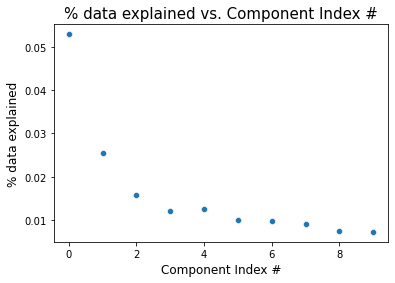

In [11]:
sns.scatterplot(x=range(0,10), y=svd.explained_variance_ratio_)
plt.ylabel('% data explained', fontsize=12)
plt.xlabel('Component Index #', fontsize=12)
plt.title('% data explained vs. Component Index #', fontsize=15)

#### Components with highest explained variance ratios:
1. Component #1
2. Component #2

## Part IV: Visualization
### Plotting the Two Components with the Highest Explained Variance:

Text(0.5, 1.0, '2nd vs. 1st Highest Explained Variance Components')

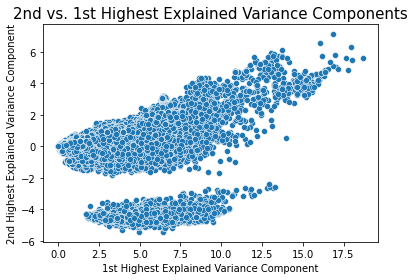

In [12]:
sns.scatterplot(x=svd_matrix[:,0], y=svd_matrix[:,1])
plt.ylabel('2nd Highest Explained Variance Component', fontsize=10)
plt.xlabel('1st Highest Explained Variance Component', fontsize=10)
plt.title('2nd vs. 1st Highest Explained Variance Components', fontsize=15)

### Plotting the Two Components with the Highest Explained Variance Colored by Category:

Text(0.5, 1.0, '2nd vs. 1st Highest Explained Variance Components')

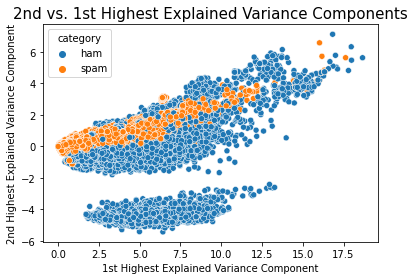

In [13]:
sns.scatterplot(x=svd_matrix[:,0], y=svd_matrix[:,1], hue=email_df['category'])
plt.ylabel('2nd Highest Explained Variance Component', fontsize=10)
plt.xlabel('1st Highest Explained Variance Component', fontsize=10)
plt.title('2nd vs. 1st Highest Explained Variance Components', fontsize=15)

## Reflection Questions:
1. Assume that 32-bit (4-byte) floating point values are used to store the counts. Calculate the memory usage of a dense matrix with those dimensions.
  - 4 bytes * 63542 rows * 300984 columns = ~76.5 GB
2. The vectorizer returns a sparse matrix in compressed row format (CSR). Assume that the sparse matrix uses one 32-bit (4-byte) floating point number and one 32-bit (4-byte) integer for each nonzero entry and one 32-bit (4-byte) integer for each row. Calculate the memory usage for the sparse matrix.
  - 8 bytes * 6885706 nonzero entries + 4 bytes * 63542 rows = ~0.055 GB
3. Calculate the sparsity ratio (100 * number of nonzero entries divided by maximum possible entries).
  - 100 * ( 6885706 nonzero entries / (63542 rows * 300984 columns)) = ~0.036
4. Based on your analysis, do you think that the sparse matrix is better suited for this situation? If so, why?
  - I believe that the sparse matrix is better suited for this situation. The reason for this is that the dense matrix's data only contains 0.036% meaningful data, as such, the vast majority of storage is wasted on values that don't convey any information. The sparse matrix is much better for this situation because it distills the dense matrix down to only the meaningful components, and uses a fraction of the storage space.
5. In the scatter plot with label classes, how would you describe the relationship between the pattern you observe and the ham and spam messages?
  - I would describe the pattern between the ham and spam categories as non-linear and non-separable. In the plots there are two distinct groupings of emails, a lower group and an upper group. The lower group is comprised exclusively of "ham" emails. However, the upper group is a large grouping of "ham" emails with a sub-grouping of "spam" emails injected at the center of the group. As such, no distinct separation is offered by the 1st and 2nd highest explained variance components. It is likely that additional components will need to be included in order to offer separation between the two categories.
  
## Conclusion:
- This labs was as an exercise in using dimensionality reduction techniques in order to aid in the exploratory data analysis of a data set comprised of emails that are labeled as spam, or not spam. The SciKit Learn library was used to transform a Pandas representation of the data set into a compressed sparse row matrix format representing a bag-of-words model of the email data set. The benefits of using a sparse matrix was realized in the analysis as the sparse representation requires ~0.055 GB of storage, while the dense version of this matrix would have required ~76.5 GB of storage. However, once the bag-of-words matrix was created, it was used to as input for Scikit Learn's TruncatedSVD to create a feature matrix with 10 components that represented the same underlying data, but in a greatly reduced number of dimensions compared to the original 300984 columns. The two components with the highest explained variance were examined, and plotted against each other to explore the relationships they would portray for "spam" vs. "ham" emails. Unfortunately, the two highest explained variance components did not offer any sort of clear separation between the two groups of emails, and it was determined that more components would likely need to be included in order to separate the two categories of emails.
